<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predecir Sobrevivientes del Titanic**

In [316]:
import pandas as pd

In [317]:
#Utilizaremos el mismo dataset del laboratorio anterior
df = pd.read_csv('/content/titanic.csv', index_col=0)

# Limpieza de datos

In [318]:
print('------------------------------')
print('(Filas, Columnas) = ',df.shape)
print('------------------------------')
print('Tamaño del dataframe: ',df.size)
print('------------------------------')
print('Nombre de las columnas: ')
list(df.columns)

------------------------------
(Filas, Columnas) =  (1309, 12)
------------------------------
Tamaño del dataframe:  15708
------------------------------
Nombre de las columnas: 


['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Survived']

In [319]:
#Reemplazamos datos faltantes en Edad por su promedio, omitiendo los datos nulos:
df['Age']=df['Age'].fillna(df['Age'].mean(skipna = True))

In [320]:
#Datos faltantes ajustado Age:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

In [321]:
#Eliminamos la columna Cabin:
df = df.drop(['Cabin'],axis=1)

In [322]:
#Datos faltantes eliminado Cabin:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
Survived       0
dtype: int64

In [323]:
#Eliminamos todo el resto de filas donde hay datos nulos:
df=df.dropna()

In [324]:
#Datos faltantes eliminado NA en Fare y Embarked:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [325]:
#Revisamos las variables
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0


In [326]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Survived         int64
dtype: object

No nos interesa para la predicción:
- El nombre del pasajero
- El ID del pasajero
- El número de ticket

In [327]:
#Eliminamos Name, PassengerId y Ticket
df = df.drop(['PassengerId'],axis=1)
df = df.drop(['Name'],axis=1)
df = df.drop(['Ticket'],axis=1)

In [328]:
#Convertimos la variable Pclass a object para poder hacerla Dummy
df['Pclass'] = df['Pclass'].astype('object')

In [329]:
df['Pclass'].head()

0    3
1    3
2    2
3    3
4    3
Name: Pclass, dtype: object

# **Separar dataframe en Train y Test**

In [330]:
#Importamos librería para separar set de datos
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [331]:
#Pasamos las variables categóricas a dummies
df_categoricas = df.select_dtypes(include=['object'])
df_dummies = pd.get_dummies(df_categoricas, drop_first=True)
df_dummies.head(3)

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,False,True,True,True,False
1,False,True,False,False,True
2,True,False,True,True,False


In [332]:
df_dummies = pd.get_dummies(df_categoricas, drop_first=True).astype(int)
df_dummies.head(3)

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,1,1,1,0
1,0,1,0,0,1
2,1,0,1,1,0


In [333]:
#Seleccionamos las variables numéricas del set de datos:
df_numericas = df.select_dtypes(include=['float64','int64'])

In [334]:
#Agrupamos las variables numéricas con dummies
df_final = pd.concat([df_numericas, df_dummies], axis=1)

In [335]:
#Definimos X e Y
X = df_final.drop(['Survived'], axis=1)
Y = df_final['Survived']

In [336]:
# Definimos la semilla a utilizar
semilla = 42

#Set de entrenamiento con 20% de testeo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=semilla)

# **Regresión Logística**

In [337]:
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [338]:
#Instanciar modelo
model_rlog = LogisticRegression()

In [339]:
#Entrenamiento
model_rlog.fit(X_train, Y_train)

LogisticRegression()

In [340]:
#Predecimos los valores de Y en el set de testeo
Y_pred = model_rlog.predict(X_test)

In [341]:
#Intercepto del modelo
model_rlog.intercept_

array([3.75712152])

In [342]:
#Coeficientes del modelo
pd.DataFrame(model_rlog.coef_[0], X.columns,
            columns=['coeficiente'])

,coeficiente
Age,-0.030518
SibSp,-0.192693
Parch,-0.134676
Fare,0.003670
Pclass_2,-0.673163
Pclass_3,-1.656050
Sex_male,-3.523473
Embarked_Q,0.207494
Embarked_S,-0.405865


# **Matriz de Confusión**

In [343]:
#Importamos librería para Matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [344]:
matriz = confusion_matrix(Y_test, Y_pred)

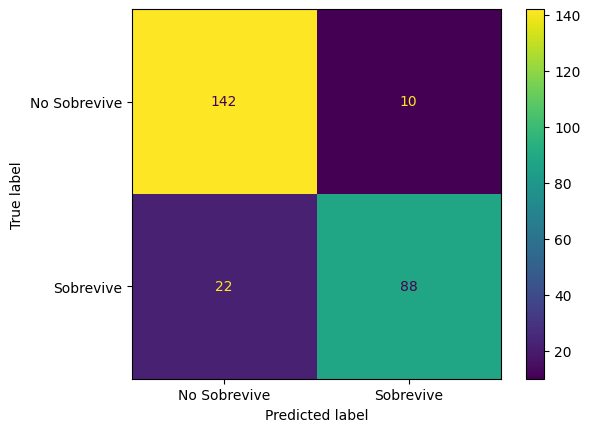

In [345]:
#Graficamos matriz de confusion
class_names = ['No Sobrevive', 'Sobrevive']

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=class_names)
disp.plot()

# **Accuracy, Precision, Recall y F-Score**

In [346]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [347]:
#Accuracy = TP+TN / P+N
accuracy_rlog = accuracy_score(Y_test, Y_pred)*100
print('Accuracy: ',accuracy_rlog.round(2),'%')

#Precision = TP / TP+FP
precision_rlog = precision_score(Y_test, Y_pred)*100
print('Precision: ',precision_rlog.round(2),'%')

#Recall o Sensitivity = TP / TP+FN
recall_rlog = recall_score(Y_test, Y_pred)*100
print('Sensitivity: ',recall_rlog.round(2),'%')


Accuracy:  87.79 %
Precision:  89.8 %
Sensitivity:  80.0 %


In [348]:
from sklearn.metrics import f1_score

In [350]:
#F-Score = 2 * (Precision*Recall) / (Precision + Recall)
fscore_rlog = f1_score(Y_test, Y_pred)*100
print('F-Score: ',fscore_rlog.round(2),'%')

F-Score:  84.62 %


#**CURVA ROC**

In [264]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

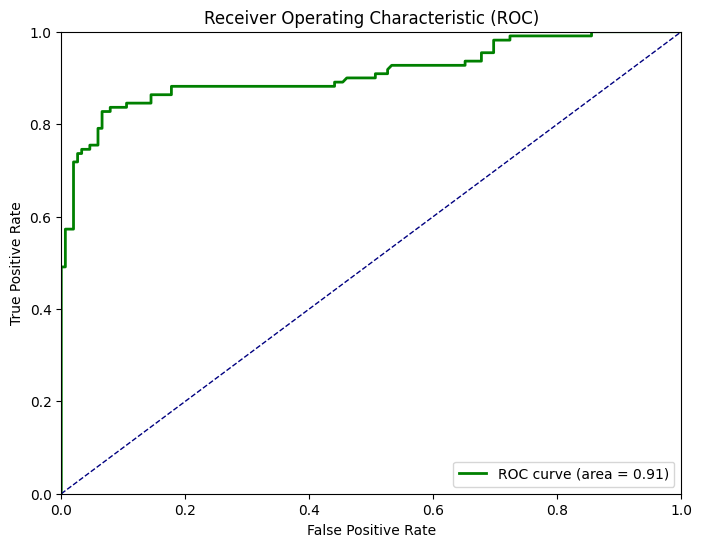

In [265]:
#Curva ROC y AUC
#fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, model_rlog.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **KNN Vecinos más cercanos**

In [266]:
from sklearn.neighbors import KNeighborsClassifier

In [267]:
#instanciemos y entrenemos el modelo
model_knn = KNeighborsClassifier(n_neighbors=10,weights='uniform')
model_knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=10)

In [268]:
#Predecimos los valores de Y en el set de testeo
Y_pred = model_knn.predict(X_test)

In [269]:
#Coeficientes del modelo: ¿por qué arroja error?
pd.DataFrame(model_knn.coef_[0], X.columns,
            columns=['coeficiente'])

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

In [270]:
matriz = confusion_matrix(Y_test, Y_pred)

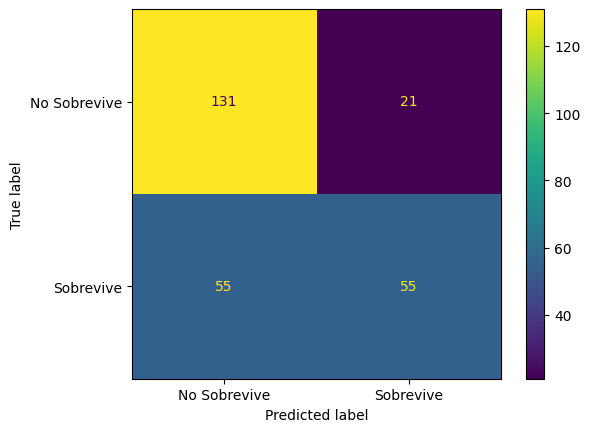

In [271]:
#Graficamos matriz de confusion
class_names = ['No Sobrevive', 'Sobrevive']

disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=class_names)
disp.plot()

In [272]:
#Accuracy = TP+TN / P+N
accuracy_knn1 = accuracy_score(Y_test, Y_pred)*100
print('Accuracy: ',accuracy_knn1.round(2),'%')

#Precision = TP / TP+FP
precision_knn1 = precision_score(Y_test, Y_pred)*100
print('Precision: ',precision_knn1.round(2),'%')

#Recall o Sensitivity = TP / TP+FN
recall_knn1 = recall_score(Y_test, Y_pred)*100
print('Sensitivity: ',recall_knn1.round(2),'%')

Accuracy:  70.99 %
Precision:  72.37 %
Sensitivity:  50.0 %


#**¿Cómo varía KNN según los hiperparámetros?**

In [274]:
#instanciemos y entrenemos el modelo
#Variar n_neighbors y weights='uniform' o 'distance'
model_knn = KNeighborsClassifier(n_neighbors=100,weights='distance')
model_knn.fit(X,Y)

KNeighborsClassifier(n_neighbors=100, weights='distance')

In [275]:
#Predecimos los valores de Y en el set de testeo
Y_pred = model_knn.predict(X_test)

In [276]:
#Accuracy = TP+TN / P+N
accuracy_knn2 = accuracy_score(Y_test, Y_pred)*100
print('Accuracy: ',accuracy_knn2.round(2),'%')

#Precision = TP / TP+FP
precision_knn2 = precision_score(Y_test, Y_pred)*100
print('Precision: ',precision_knn2.round(2),'%')

#Recall o Sensitivity = TP / TP+FN
recall_knn2 = recall_score(Y_test, Y_pred)*100
print('Sensitivity: ',recall_knn2.round(2),'%')

Accuracy:  97.71 %
Precision:  100.0 %
Sensitivity:  94.55 %


In [277]:
# veamos como le va a nuestro modelo variando la cantidad de vecinos y el tipo de peso
valores_k = list(range(1,50,4))
resultados_train_u = []
resultados_test_u  = []
resultados_train_d = []
resultados_test_d  = []

for k in valores_k:
    # instanciamos el modelo uniforme
    knn_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_u.fit(X_train, Y_train)
    y_train_pred = knn_u.predict(X_train)
    y_pred = knn_u.predict(X_test)
    resultados_train_u.append(accuracy_score(Y_train, y_train_pred))
    resultados_test_u.append(accuracy_score(Y_test, y_pred))

    knn_d = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_d.fit(X_train, Y_train)
    y_train_pred = knn_d.predict(X_train)
    y_pred = knn_d.predict(X_test)
    resultados_train_d.append(accuracy_score(Y_train, y_train_pred))
    resultados_test_d.append(accuracy_score(Y_test, y_pred))

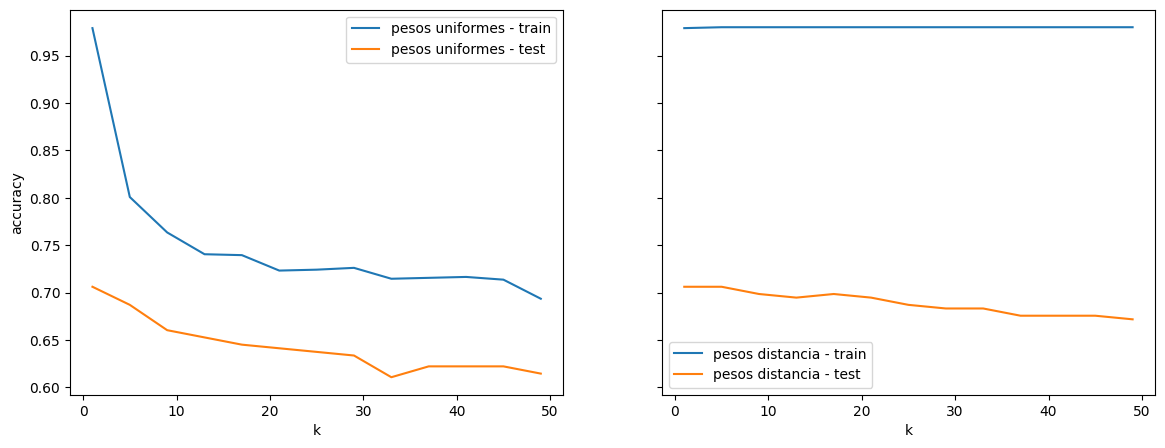

In [278]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)
ax[0].plot(valores_k, resultados_train_u, valores_k, resultados_test_u);
ax[0].legend(['pesos uniformes - train', 'pesos uniformes - test']);
ax[0].set(xlabel='k',ylabel='accuracy');

ax[1].plot(valores_k, resultados_train_d, valores_k, resultados_test_d);
ax[1].legend(['pesos distancia - train', 'pesos distancia - test']);
ax[1].set(xlabel='k');

#**¿Y si cambio el tipo de distancia?**

In [279]:
# veamos como le va a nuestro modelo variando la cantidad de vecinos y el tipo de peso
valores_k = list(range(1,50,4))
resultados_train_mh = []
resultados_test_mh  = []
resultados_train_ch = []
resultados_test_ch  = []

for k in valores_k:
    # instanciamos el modelo uniforme
    knn_mh = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_mh.fit(X_train, Y_train)
    y_train_pred = knn_mh.predict(X_train)
    y_pred = knn_mh.predict(X_test)
    resultados_train_mh.append(accuracy_score(Y_train, y_train_pred))
    resultados_test_mh.append(accuracy_score(Y_test, y_pred))

    knn_ch = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn_ch.fit(X_train, Y_train)
    y_train_pred = knn_ch.predict(X_train)
    y_pred = knn_ch.predict(X_test)
    resultados_train_ch.append(accuracy_score(Y_train, y_train_pred))
    resultados_test_ch.append(accuracy_score(Y_test, y_pred))

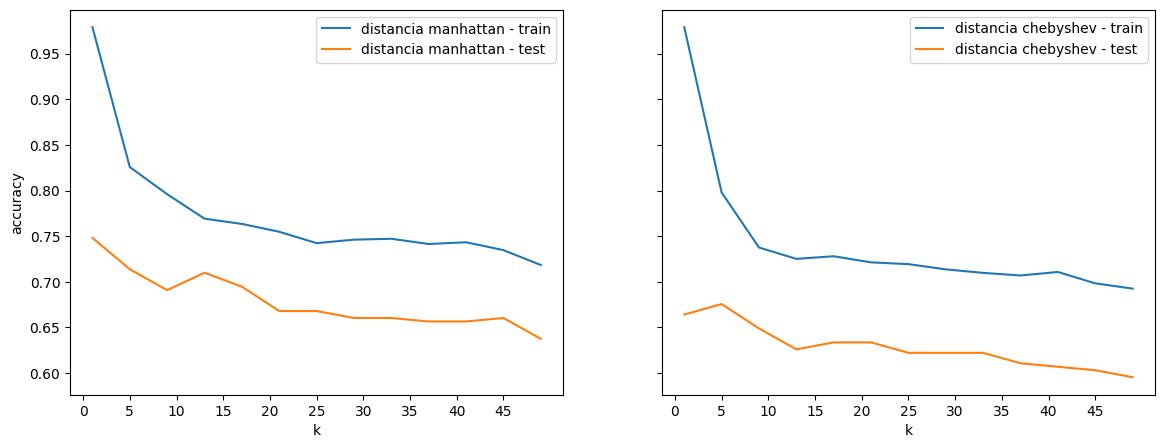

In [374]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)
ax[0].plot(valores_k, resultados_train_mh, valores_k, resultados_test_mh);
ax[0].legend(['distancia manhattan - train', 'distancia manhattan - test']);
ax[0].set(xlabel='k',ylabel='accuracy');
ax[0].set_xticks(range(0, 50, 5));

ax[1].plot(valores_k, resultados_train_ch, valores_k, resultados_test_ch);
ax[1].legend(['distancia chebyshev - train', 'distancia chebyshev - test']);
ax[1].set(xlabel='k');
ax[1].set_xticks(range(0, 50, 5));

#**Comparativa modelo vs Regresión Logística**

In [395]:
model_knn = KNeighborsClassifier(n_neighbors=3,weights='uniform', metric='manhattan')
model_knn.fit(X,Y)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [396]:
#Predecimos los valores de Y en el set de testeo
Y_pred = model_knn.predict(X_test)

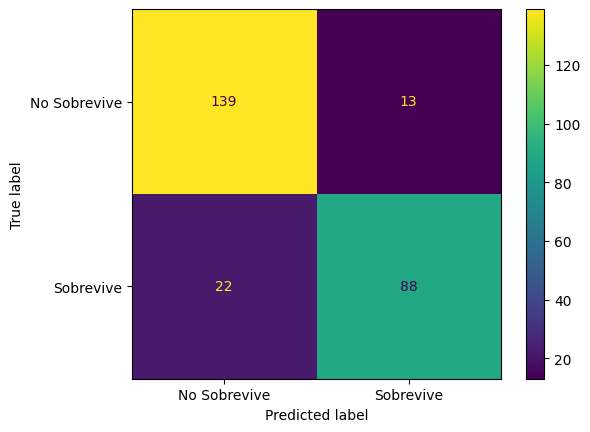

In [397]:
#Graficamos matriz de confusion
class_names = ['No Sobrevive', 'Sobrevive']

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_pred), display_labels=class_names)
disp.plot()

In [398]:
print('Modelo RLog')
print('Accuracy: ',accuracy_rlog.round(2),'%')
print('Precision: ',precision_rlog.round(2),'%')
print('Sensitivity: ',recall_rlog.round(2),'%')

print('Modelo KNN')
accuracy_knn3 = accuracy_score(Y_test, Y_pred)*100
print('Accuracy: ',accuracy_knn3.round(2),'%')
precision_knn3 = precision_score(Y_test, Y_pred)*100
print('Precision: ',precision_knn3.round(2),'%')
recall_knn3 = recall_score(Y_test, Y_pred)*100
print('Sensitivity: ',recall_knn3.round(2),'%')

Modelo RLog
Accuracy:  87.79 %
Precision:  89.8 %
Sensitivity:  80.0 %
Modelo KNN
Accuracy:  86.64 %
Precision:  87.13 %
Sensitivity:  80.0 %


In [399]:
#F-Score = 2 * (Precision*Recall) / (Precision + Recall)
print('F-Score RLog: ',fscore_rlog.round(2),'%')

fscore_knn = f1_score(Y_test, Y_pred)*100
print('F-Score KNN: ',fscore_knn.round(2),'%')

F-Score RLog:  84.62 %
F-Score KNN:  83.41 %
